# Documentation for the 72 month all-sky models

The process created 72 monthly sky models, using the same code and procedures as for the full-duration sky models used to create 2FGL, 3FGL, and the current 6-year Pass 8 model, uw972.

### Data preparation
Note that all files are at SLAC, under the catalog group area, `/nfs/farm/g/glast/g/catalog/`.
Data for all months as defined by Jean Ballet, are located in the folder `P301/Source/`. From these, I created pointlike binned photon data files in  `pointlike/fermi/data/P8_P301/binfiles`. Note that this uses the front/back event types.

### Processing
Event processing is done individually for each month, using the same IRF and background model as for the full six years. There are four stages, all implemented with a task `UWpipeline` in the Fermi-LAT [Pipeline II](http://glast-ground.slac.stanford.edu/Pipeline-II/exp/Fermi/task.jsp?task=141117377). I will show examples for month16 below. The rest are similar.

1. Create a model using the 6-year set of source, but with spectral shape parameters and positions fixed. That is, only the normalization is free. Remove those that have TS<10. 

2. Add all seeds from a PGWAVE run on almost the same month. These files exist in the folder `transients/`. This triggers an update interation cycle, which continues until the log likelihod change for all ROIs is less than 10.

3. Run the "tables" stage, which measures, for each of 3.1 M nside=512 positions, the TS of a point source with spectral index 2.2. This is done in parallel for each ROI, the results assempled into one FITS file. Then make a clustering study to extract potential seeds. Since we do not use a specific Sun model, the path of the Sun along the ecliptic is masked out of the search for seeds.  

4. Add the seeds from the TS map cluster analysis. This again triggers an iteration until no ROI changes by more that 10. This generates summary plots.

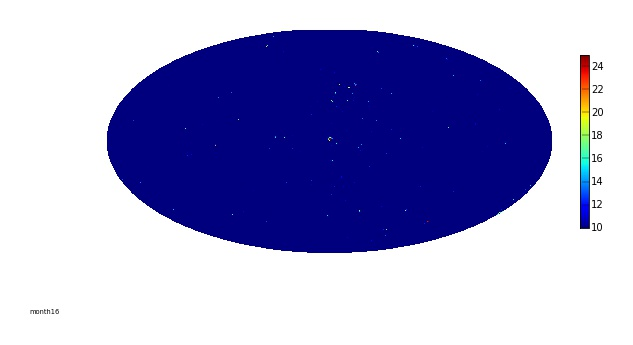

In [9]:
display.Image('month16/plots/hptables_ts/ts_map_month16.jpg')

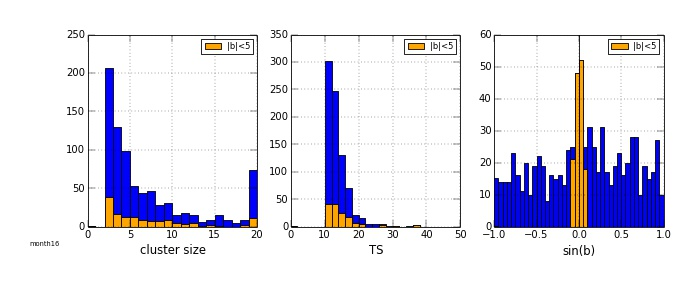

In [7]:
display.Image('month16/plots/hptables_ts/seed_plots_month16.jpg')

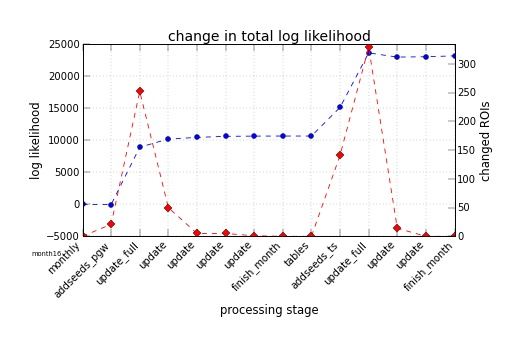

In [3]:
from IPython import display
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))
display.Image('month16/plots/counts/loglikelihood_month16.jpg')